In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

data['time'] = pd.to_datetime(data['time'])

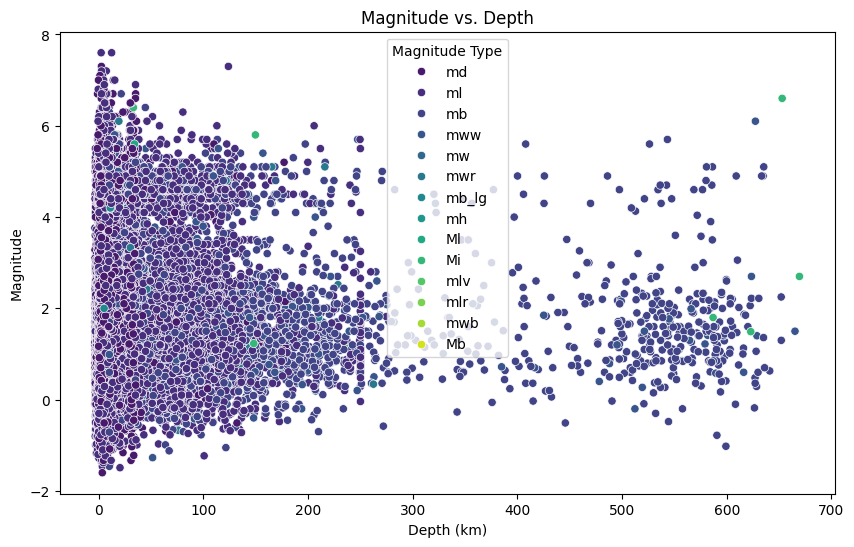

In [3]:
# Scatter plot of Magnitude vs. Depth
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='mag', data=data, hue='magType', palette='viridis')
plt.title('Magnitude vs. Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.legend(title='Magnitude Type')
plt.show()

In [3]:


# Binning latitude and longitude
data['latitude_bin'] = pd.cut(data['latitude'], bins=30)
data['longitude_bin'] = pd.cut(data['longitude'], bins=30)

C:\Users\Soroush\AppData\Local\Temp\ipykernel_16668\109151515.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = data.pivot_table(index='latitude_bin', columns='longitude_bin', values='mag', aggfunc='count').fillna(0)


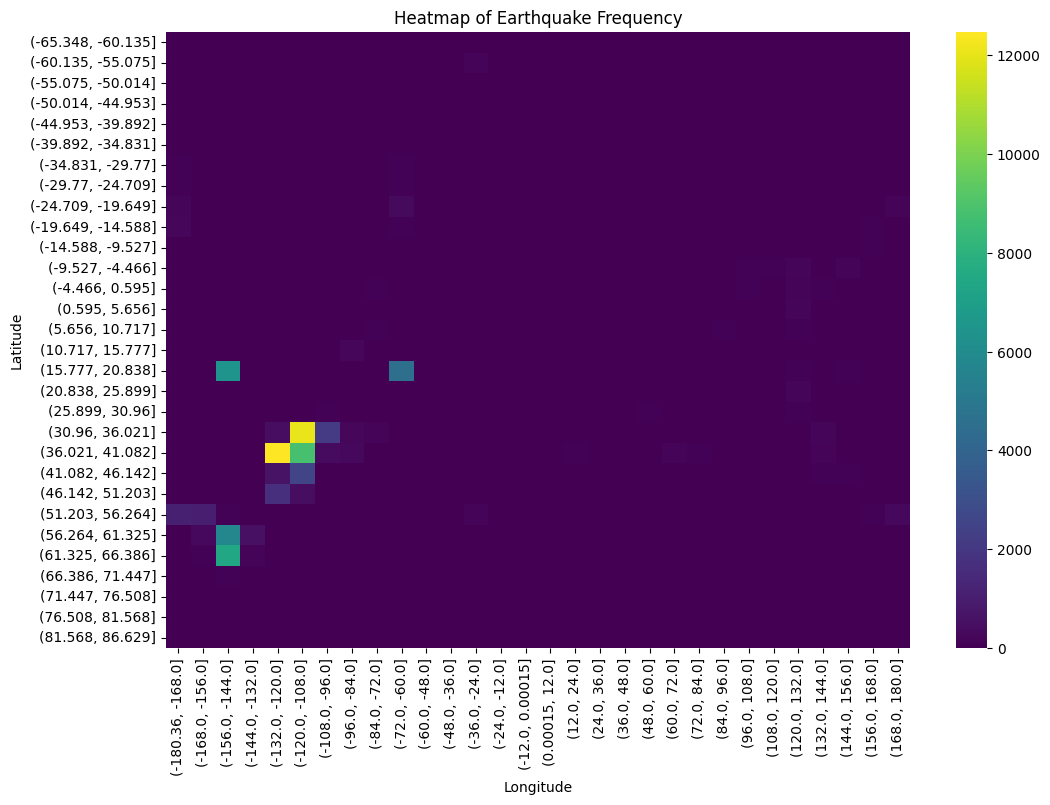

In [4]:


# Heatmap of Earthquake Frequency by Location
plt.figure(figsize=(12, 8))
heatmap_data = data.pivot_table(index='latitude_bin', columns='longitude_bin', values='mag', aggfunc='count').fillna(0)
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Earthquake Frequency')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\Soroush\AppData\Local\Temp\ipykernel_16668\1541417212.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('time')['mag'].resample('M').count().plot()


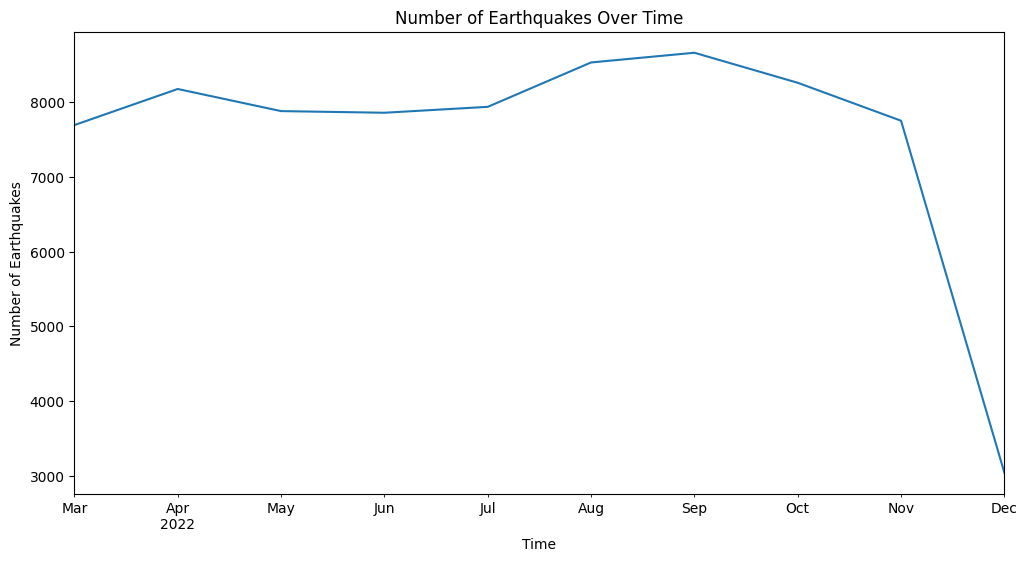

In [5]:


# Time Series Analysis of Earthquakes
plt.figure(figsize=(12, 6))
data.set_index('time')['mag'].resample('M').count().plot()
plt.title('Number of Earthquakes Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Earthquakes')
plt.show()

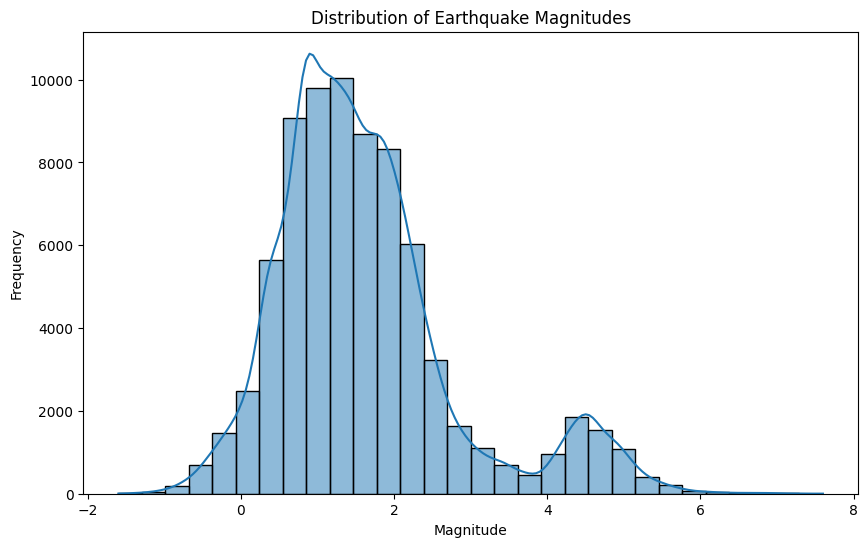

In [6]:


# Bar Chart of Earthquake Magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(data['mag'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

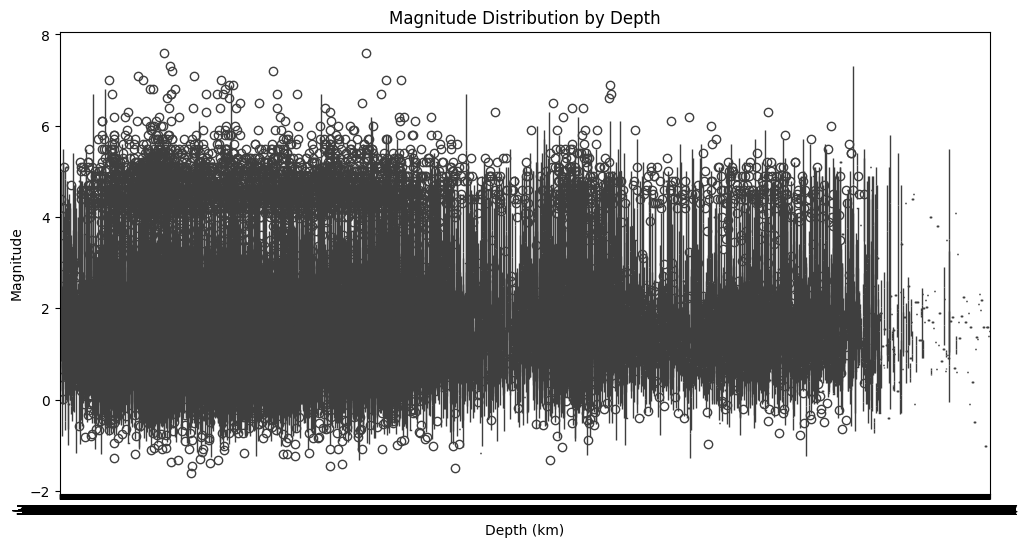

In [7]:


# Box Plot of Magnitude by Depth
plt.figure(figsize=(12, 6))
sns.boxplot(x='depth', y='mag', data=data)
plt.title('Magnitude Distribution by Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

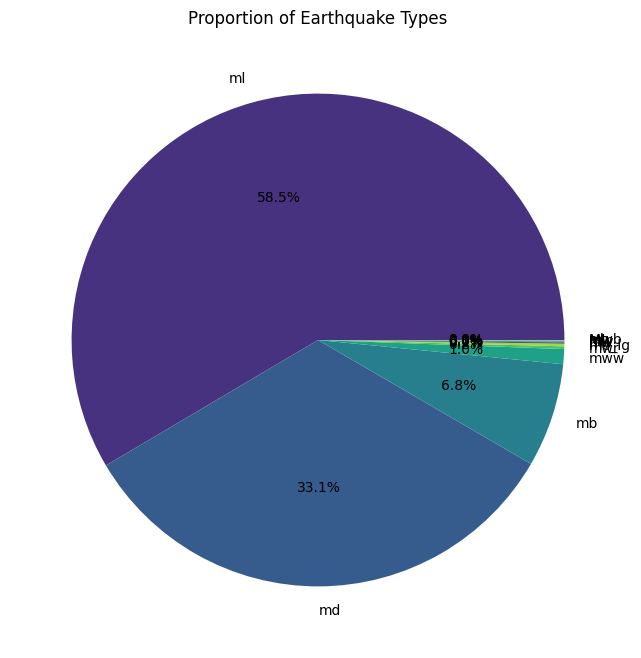

In [8]:


# Pie Chart of Earthquake Types
plt.figure(figsize=(8, 8))
data['magType'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Proportion of Earthquake Types')
plt.ylabel('')
plt.show()

In [9]:
import lightningchart as lc
import random

with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)
# here the reason of why we need lookup_values is 
n = 100000
x_values = [random.gauss(0, 1) for _ in range(n)]
y_values = [random.gauss(0, 1) for _ in range(n)]
lookup_values = [random.uniform(0, 1) for _ in range(n)]

chart = lc.ScatterChart(
    theme=lc.Themes.White,
    title='Scatter Chart',
    point_shape='triangle',
    xlabel='x',
    ylabel='y',
    individual_colors=True,
    individual_lookup_values=True
)
series = chart.series.append_samples(
    x_values=x_values,
    y_values=y_values,
    lookup_values=lookup_values
)
series.set_palette_colors(
    steps=[
        {'value': 0, 'color': lc.Color(0, 64, 128)},
        {'value': 1, 'color': lc.Color(255, 128, 64)},
    ],
    look_up_property='value',
    percentage_values=False
)
legend = chart.add_legend(data=chart).set_title('')
chart.open()

In [10]:
import lightningchart as lc
import pandas as pd
import numpy as np
import builtins

with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

x_values = data['depth'].values.tolist()
y_values = data['mag'].values.tolist()
min_value=int(builtins.min(y_values))
max_value=int(builtins.max(y_values))
lookup_values = y_values

chart = lc.ScatterChart(
    theme=lc.Themes.White,
    title='Magnitude vs. Depth',
    point_shape='circle',
    xlabel='Depth (km)',
    ylabel='Magnitude',
    individual_colors=True,
    individual_lookup_values=True
)
series = chart.series.append_samples(
    x_values=x_values,
    y_values=y_values,
    lookup_values=lookup_values
)
series.set_palette_colors(
    steps=[
        {'value': min_value, 'color': lc.Color(0, 64, 128)},
        {'value': max_value, 'color': lc.Color(255, 128, 64)},
    ],
    look_up_property='value',
    percentage_values=False
)
legend = chart.add_legend(data=chart).set_title('Magnitude')
chart.open()


127.0.0.1 - - [17/Jul/2024 22:55:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2024 22:55:52] "GET / HTTP/1.1" 200 -


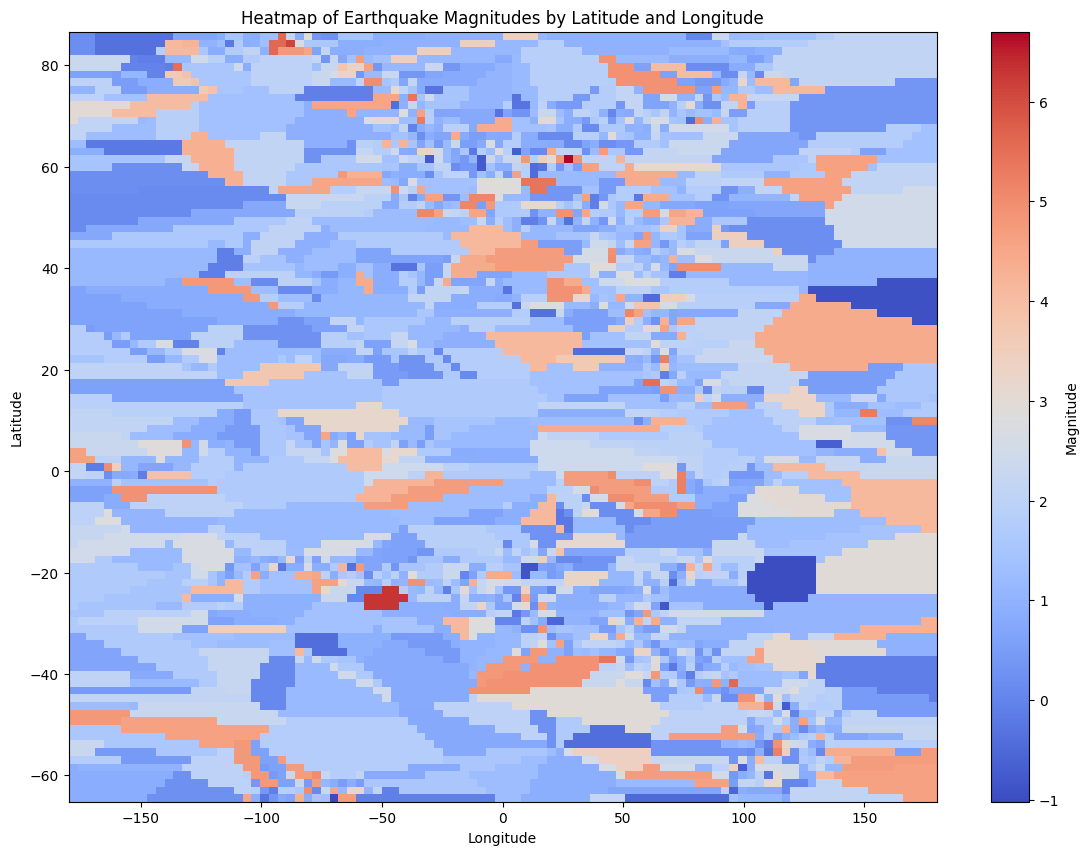

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

# Create a grid to interpolate the magnitude values
latitudes = np.linspace(data['latitude'].min(), data['latitude'].max(), 100)
longitudes = np.linspace(data['longitude'].min(), data['longitude'].max(), 100)
lat_grid, lon_grid = np.meshgrid(latitudes, longitudes)

# Interpolate magnitude values on the grid
mag_grid = np.zeros_like(lat_grid)
grid_z=[]
# Simple nearest neighbor interpolation for this example
for i in range(lat_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        # Find the closest point in the dataset
        distances = np.sqrt((data['latitude'] - lat_grid[i, j])**2 + (data['longitude'] - lon_grid[i, j])**2)
        closest_index = distances.idxmin()
        mag_grid[i, j] = data.loc[closest_index, 'mag']
        grid_z.append(data.loc[closest_index, 'mag'])

# Plot the heatmap
plt.figure(figsize=(14, 10))
plt.imshow(mag_grid, extent=(data['longitude'].min(), data['longitude'].max(), data['latitude'].min(), data['latitude'].max()), origin='lower', cmap='coolwarm', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('Heatmap of Earthquake Magnitudes by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [17]:
import lightningchart as lc
import pandas as pd
import numpy as np
import builtins

with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

# Create a grid to interpolate the magnitude values
latitudes = np.linspace(data['latitude'].min(), data['latitude'].max(), 100)
longitudes = np.linspace(data['longitude'].min(), data['longitude'].max(), 100)
lat_grid, lon_grid = np.meshgrid(latitudes, longitudes)

# Interpolate magnitude values on the grid
mag_grid = np.zeros_like(lat_grid)
grid_z = []
# Simple nearest neighbor interpolation for this example
for i in range(lat_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        # Find the closest point in the dataset
        distances = np.sqrt((data['latitude'] - lat_grid[i, j])**2 + (data['longitude'] - lon_grid[i, j])**2)
        closest_index = distances.idxmin()
        mag_grid[i, j] = data.loc[closest_index, 'mag']
        grid_z.append(data.loc[closest_index, 'mag'])
print(min(grid_z))
print(max(grid_z))
# Flatten the grid for the heatmap
mag_grid_flat = mag_grid.flatten()

# Create the chart
chart = lc.ChartXY(
    title="Heatmap of Earthquake Magnitudes by Latitude and Longitude",
    theme=lc.Themes.White  # Use White theme
)

# Create the heatmap series
heatmap_series = chart.add_heatmap_grid_series(
    columns=len(longitudes),
    rows=len(latitudes),
    x_axis=chart.get_default_x_axis(),
    y_axis=chart.get_default_y_axis()
)

# Set the data for the heatmap
heatmap_series.invalidate_intensity_values(mag_grid)

# Set start and end coordinates
heatmap_series.set_start(x=data['longitude'].min(), y=data['latitude'].min())
heatmap_series.set_end(x=data['longitude'].max(), y=data['latitude'].max())

# Simplified custom palette
custom_palette = [
    {"value": np.nanmin(grid_z), "color": lc.Color(0, 0, 255)},       # Blue
    {"value": np.nanpercentile(grid_z, 25), "color": lc.Color(0, 255, 255)},     # Cyan
    {"value": np.nanmedian(grid_z), "color": lc.Color(0, 255, 0)},    # Green
    {"value": np.nanpercentile(grid_z, 75), "color": lc.Color(255, 255, 0)},     # Yellow
    {"value": np.nanmax(grid_z), "color": lc.Color(255, 0, 0)},        # Red
]

heatmap_series.set_palette_colors(
    steps=custom_palette,
    look_up_property='value',
    interpolate=True
)

# Set axis titles
chart.get_default_x_axis().set_title('Longitude')
chart.get_default_y_axis().set_title('Latitude')

# Set axis limits based on the actual data ranges
chart.get_default_x_axis().set_interval(data['longitude'].min(), data['longitude'].max())
chart.get_default_y_axis().set_interval(data['latitude'].min(), data['latitude'].max())
chart.add_legend(data=heatmap_series)

chart.open()


-1.02
6.7


127.0.0.1 - - [18/Jul/2024 12:14:57] "GET / HTTP/1.1" 200 -
